# Predicting usage of video game project

Background: 
This is a data analysis project for the study of video game servers. The research team from the Department of Computer Science at UBC collected data on how people play video games. This project will analyze the collected data to ensure that the MineCraft server they establish has a clear recruitment target and attracts players.

In this project, I will conduct an analysis based on specific issues. In particular, we want to know which players will actively participate in subscribing to the new information of the game and provide a large amount of data for us to identify the target recruitment group.

We have two pieces of data. The first one is called "players", which is the data table of all players. Some of the variables include the basic information of the players, how much gaming experience they have, whether they subscribe, the players' email addresses and the playing time.The second one is about the game session data of each player, recording the start and end game times of each player.

Firstly, let's load the players data list into notebook to see what we get. I'll assign the data to players.

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('cleanup.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [4]:
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


This data includes some important variables:
experience: The gaming experience of players.
subscribe: If the players subscribe any video game channel. 
played_hours: The duration of the game played by the player
gender: Players' gender.
Age: Players" age.

In order for furthur analysis, I'll handle this data simply first.

I will first screen out those who have not subscribed to the game channel and have very little time to play games. This kind of people are very likely not to subscribe to any new information about the games and participate in them.

In [5]:
players_new <- players |> 
               filter(subscribe == "TRUE" & played_hours >= 1) #filter out the players that we are not interested in
players_new

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,22a78bfd44e46931261d06864b92cf9a8fd77fb02bec66cb71646dd9da222a0d,1.2,Aaron,Non-binary,17
Regular,TRUE,ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,178.2,Piper,Female,19
Amateur,TRUE,24d4892c2c3ce11d3e54c3bf31ee218901cac7a2f564911d67424c8fdf0874fe,32.0,Sidney,Male,22


We also want to know if there's any relationship between player age and game duration. To know this, we can create a scatter plot. 

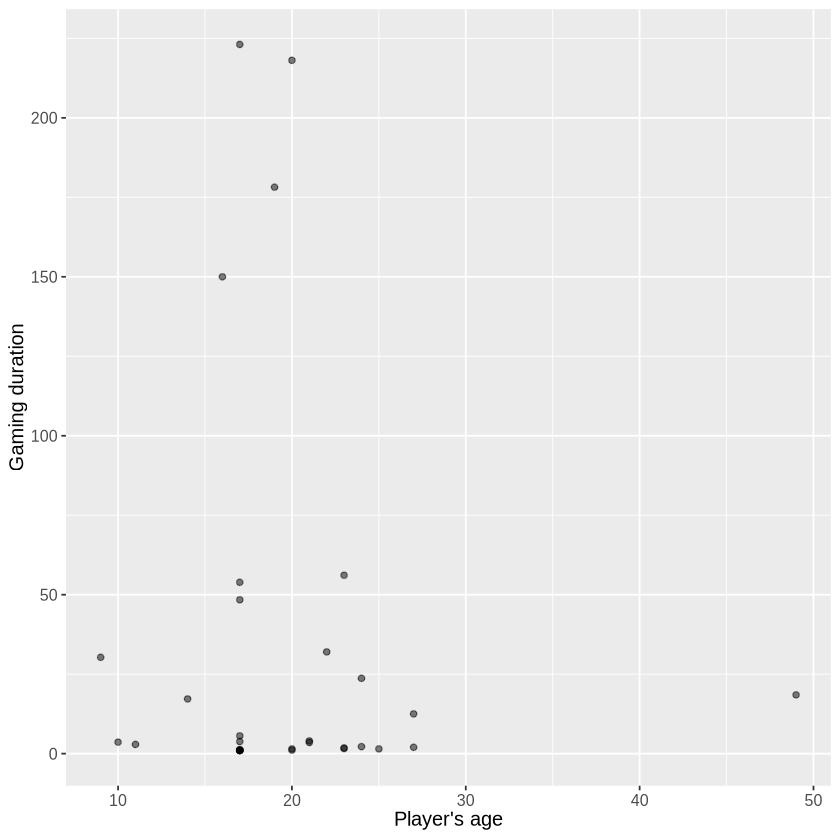

In [6]:
plot_1 <- players_new |>
          ggplot(aes(x = Age, y = played_hours)) + 
          geom_point(alpha = 0.5) + 
          labs(x = "Player's age", y = "Gaming duration") + 
          theme(text = element_text(size = 12))

plot_1

There's no linear relationship between Age and game duration, but we can see that most players are under 30. And people in 15 - 25 spend more time on video games. 

Besides, we are also curious what gender usually play more games. 

In [7]:
count_genders <- players_new |>
                group_by(gender) |>
                summarize(count = n())
count_genders

gender,count
<chr>,<int>
Agender,1
Female,8
Male,20
Non-binary,3
Prefer not to say,1


It can be seen from this that most of the data were provided by males. 

Next, we redraw plot_1, but display different genders with colors.

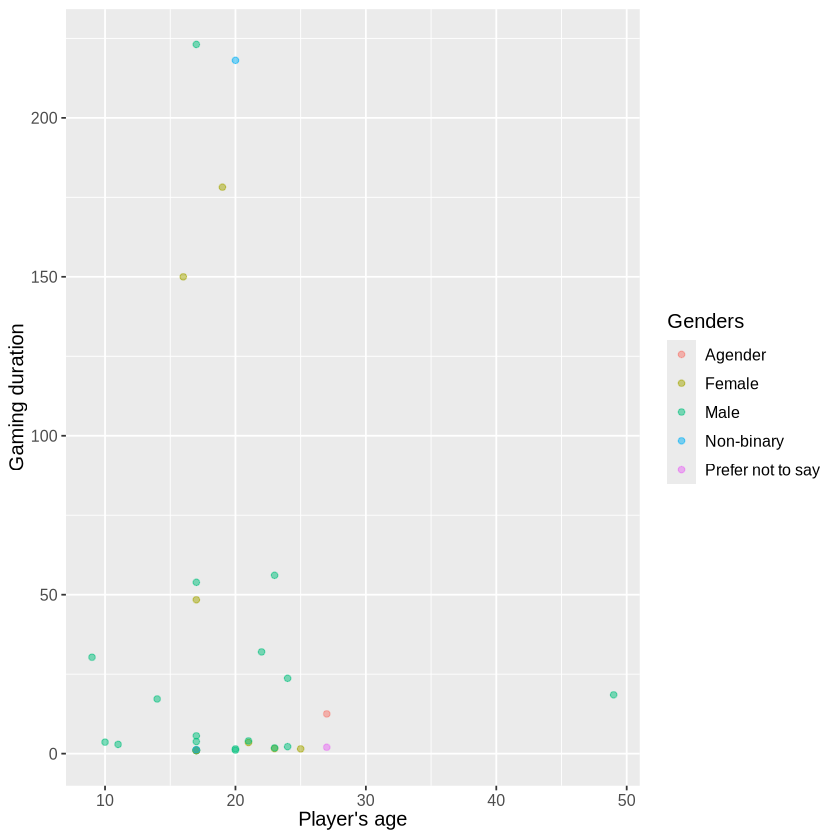

In [8]:
plot_1_new <- players_new |>
          ggplot(aes(x = Age, y = played_hours,color = gender)) + 
          geom_point(alpha = 0.5) + 
          labs(x = "Player's age", y = "Gaming duration",color = "Genders") + 
          theme(text = element_text(size = 12))

plot_1_new

There is no doubt that men usually play games for a longer time.

Additionally, we can combine expericen and gender to see if males always have more expericen in games.

In [9]:
exp_in_gender <- players_new |>
                 group_by(experience,gender) |>
                 summarize(count = n())
exp_in_gender

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


experience,gender,count
<chr>,<chr>,<int>
Amateur,Female,3
Amateur,Male,6
Amateur,Non-binary,1
⋮,⋮,⋮
Veteran,Female,1
Veteran,Male,2
Veteran,Non-binary,1


There are not many veteran, so the number of veterans in different genders is almost the same, with a slightly higher number in men.